# Projeto utilizando dados abertos

### Objetivo: Armazenas os gastos (até o momento) por deputado federal
    1. Obter os dados
    2. Realizar ajustes necessários
    3. Armazenar no sqlite

#### Importação das bibliotecas 

In [4]:
import pandas as pd
import requests

#### Buscando lista de deputados através da API

In [10]:
url_deputados = 'https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome'

resultado = requests.get(url_deputados)

In [14]:
deputados = pd.DataFrame(resultado.json()['dados'])

In [16]:
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [18]:
deputados.shape

(513, 9)

#### Buscando dados de despesas por deputados através da API

In [25]:
despesas = []

for id in deputados.id:
    url_despesas = 'https://dadosabertos.camara.leg.br/api/v2/deputados/' + str(id) + '/despesas?ordem=ASC&ano=2021'
    response = requests.get(url_despesas)
    despesa = pd.DataFrame(response.json()['dados'])
    despesa['id'] = id    
    despesas.append(despesa)
    

In [39]:
despesas[1]

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2021,1,COMBUSTÍVEIS E LUBRIFICANTES.,7138238,Nota Fiscal,0,2021-01-04,4338,190.00,https://www.camara.leg.br/cota-parlamentar/doc...,PEGASUS DA BANDEIRANTES AUTO POSTO LTDA,15809084000186,190.00,0.00,,1737636,0,204521
1,2021,1,PASSAGEM AÉREA - REEMBOLSO,7141292,Nota Fiscal,0,2021-01-11,9572140207167,3221.94,https://www.camara.leg.br/cota-parlamentar/doc...,LATAM,02012862000160,3221.94,0.00,,1739126,0,204521
2,2021,1,TELEFONIA,7141291,Nota Fiscal,0,2021-01-01,17094028,91.86,None,Telefônica Brasil S. A. VIVO,02558157000162,89.99,1.87,,1739124,0,204521
3,2021,1,TELEFONIA,7141286,Nota Fiscal,0,2021-01-01,171072860,205.57,None,Telefônica Brasil S. A. VIVO,02558157000162,163.36,42.21,,1739124,0,204521
4,2021,1,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,7138237,Nota Fiscal,0,2021-01-04,023529,45.80,https://www.camara.leg.br/cota-parlamentar/doc...,Piemonte pizza e cozinha ltda,08166424000132,45.80,0.00,,1737637,0,204521
5,2021,1,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,7141271,Nota Fiscal,0,2021-01-06,007915,26.90,https://www.camara.leg.br/cota-parlamentar/doc...,SAN JUAN SAO PAULO HOTEL LTDA,00825082000103,26.90,0.00,,1739124,0,204521
6,2021,1,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",7141298,Recibos/Outros,1,2021-01-12,1201,7.00,https://www.camara.leg.br/cota-parlamentar/doc...,99 POP,18033552000161,7.00,0.00,,1739124,0,204521
7,2021,1,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",7141302,Recibos/Outros,1,2021-01-12,12012021,22.20,https://www.camara.leg.br/cota-parlamentar/doc...,99 POP,18033552000161,22.20,0.00,,1739124,0,204521
8,2021,1,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",7141296,Recibos/Outros,1,2021-01-13,1301,7.10,https://www.camara.leg.br/cota-parlamentar/doc...,99 POP,18033552000161,7.10,0.00,,1739124,0,204521
9,2021,1,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",7141303,Recibos/Outros,1,2021-01-12,2701,11.47,https://www.camara.leg.br/cota-parlamentar/doc...,99 POP,18033552000161,11.47,0.00,,1739124,0,204521


#### Transformação dos dados

In [50]:
total = pd.concat(despesas)

In [51]:
# valores ausentes?
total.isnull().sum()

id                     0
ano                    0
mes                    0
tipoDespesa            0
codDocumento           0
tipoDocumento          0
codTipoDocumento       0
dataDocumento          0
numDocumento           0
valorDocumento         0
urlDocumento         220
nomeFornecedor         0
cnpjCpfFornecedor      0
valorLiquido           0
valorGlosa             0
numRessarcimento       0
codLote                0
parcela                0
dtype: int64

In [52]:
del total['urlDocumento']

In [53]:
total.head()

,id,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela
0,204521,2021.0,1.0,COMBUSTÍVEIS E LUBRIFICANTES.,7138238.0,Nota Fiscal,0.0,2021-01-04,4338,190.00,PEGASUS DA BANDEIRANTES AUTO POSTO LTDA,15809084000186,190.00,0.00,,1737636.0,0.0
1,204521,2021.0,1.0,PASSAGEM AÉREA - REEMBOLSO,7141292.0,Nota Fiscal,0.0,2021-01-11,9572140207167,3221.94,LATAM,02012862000160,3221.94,0.00,,1739126.0,0.0
2,204521,2021.0,1.0,TELEFONIA,7141291.0,Nota Fiscal,0.0,2021-01-01,17094028,91.86,Telefônica Brasil S. A. VIVO,02558157000162,89.99,1.87,,1739124.0,0.0
3,204521,2021.0,1.0,TELEFONIA,7141286.0,Nota Fiscal,0.0,2021-01-01,171072860,205.57,Telefônica Brasil S. A. VIVO,02558157000162,163.36,42.21,,1739124.0,0.0
4,204521,2021.0,1.0,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,7138237.0,Nota Fiscal,0.0,2021-01-04,023529,45.80,Piemonte pizza e cozinha ltda,08166424000132,45.80,0.00,,1737637.0,0.0


In [57]:
total.numRessarcimento.value_counts()

     719
0    194
Name: numRessarcimento, dtype: int64

In [58]:
total.shape

(913, 17)

In [59]:
del total['numRessarcimento']

In [61]:
print(total.shape)
total.drop_duplicates()
print(total.shape)

(913, 16)
(913, 16)


In [62]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 1
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 913 non-null    int64  
 1   ano                913 non-null    float64
 2   mes                913 non-null    float64
 3   tipoDespesa        913 non-null    object 
 4   codDocumento       913 non-null    float64
 5   tipoDocumento      913 non-null    object 
 6   codTipoDocumento   913 non-null    float64
 7   dataDocumento      913 non-null    object 
 8   numDocumento       913 non-null    object 
 9   valorDocumento     913 non-null    float64
 10  nomeFornecedor     913 non-null    object 
 11  cnpjCpfFornecedor  913 non-null    object 
 12  valorLiquido       913 non-null    float64
 13  valorGlosa         913 non-null    float64
 14  codLote            913 non-null    float64
 15  parcela            913 non-null    float64
dtypes: float64(9), int64(1), obj

In [64]:
total.valorLiquido.describe()

count      913.000000
mean       598.869025
std       2617.632764
min          2.600000
25%         66.770000
50%        149.840000
75%        244.430000
max      36000.000000
Name: valorLiquido, dtype: float64

In [65]:
total.nomeFornecedor.value_counts()

CORREIOS - SEDEX CONVENCIONAL                                83
CORREIOS - CARTA COMERCIAL                                   24
CORREIOS - ENCOMENDA PAC                                     21
Telefônica Brasil S. A. VIVO                                 19
CORREIOS - CAIXA DE ENCOMENDAS BÁSICA/CONVENCIONAL           15
                                                             ..
TIC POSTO LTDA V                                              1
ECT - EMP.BRAS.DE CORREIOS E TELEGRAFOS                       1
CENTRAL COOP                                                  1
E MENEGATTI COMERCIO DE COMBUSTIVEL LTDA                      1
CORACAO DE MARIA COMERCIO DE DERIVADOS DE PETROLEO EIRELI     1
Name: nomeFornecedor, Length: 501, dtype: int64

#### Carga dos dados

In [67]:
from sqlalchemy import create_engine

In [68]:
engine = create_engine('sqlite:///dados_abertos.db')

In [69]:
deputados.to_sql('deputados', engine)

In [70]:
total.to_sql('despesas', engine)

#### Analisando os dados

In [77]:
listaDespesas = pd.read_sql('SELECT * FROM despesas', engine)

In [80]:
listaDeputados = pd.read_sql('SELECT * FROM deputados', engine)

In [83]:
data = listaDespesas.merge(listaDeputados, on=['id'])

In [84]:
data

,index_x,id,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,...,parcela,index_y,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,204521,2021.0,1.0,COMBUSTÍVEIS E LUBRIFICANTES.,7138238.0,Nota Fiscal,0.0,2021-01-04,4338,...,0.0,1,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
1,1,204521,2021.0,1.0,PASSAGEM AÉREA - REEMBOLSO,7141292.0,Nota Fiscal,0.0,2021-01-11,9572140207167,...,0.0,1,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,2,204521,2021.0,1.0,TELEFONIA,7141291.0,Nota Fiscal,0.0,2021-01-01,17094028,...,0.0,1,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
3,3,204521,2021.0,1.0,TELEFONIA,7141286.0,Nota Fiscal,0.0,2021-01-01,171072860,...,0.0,1,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
4,4,204521,2021.0,1.0,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,7138237.0,Nota Fiscal,0.0,2021-01-04,023529,...,0.0,1,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1,74439,2021.0,1.0,SERVIÇOS POSTAIS,0.0,Recibos/Outros,1.0,2021-01-11,RSP : 2310532,...,0.0,507,https://dadosabertos.camara.leg.br/api/v2/depu...,Wolney Queiroz,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,PE,56,https://www.camara.leg.br/internet/deputado/ba...,dep.wolneyqueiroz@camara.leg.br
909,2,74439,2021.0,1.0,SERVIÇOS POSTAIS,0.0,Recibos/Outros,1.0,2021-01-18,RSP : 2310663,...,0.0,507,https://dadosabertos.camara.leg.br/api/v2/depu...,Wolney Queiroz,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,PE,56,https://www.camara.leg.br/internet/deputado/ba...,dep.wolneyqueiroz@camara.leg.br
910,0,204559,2021.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7138753.0,Nota Fiscal,0.0,2021-01-06,1762,...,0.0,509,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Neto,PT,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.zeneto@camara.leg.br
911,0,160632,2021.0,1.0,SERVIÇOS POSTAIS,0.0,Recibos/Outros,1.0,2021-01-13,RSP : 2310577,...,0.0,510,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Silva,SOLIDARIEDADE,https://dadosabertos.camara.leg.br/api/v2/part...,MG,56,https://www.camara.leg.br/internet/deputado/ba...,dep.zesilva@camara.leg.br


In [109]:
gastosDeputados = data.groupby(['nome']).sum()[['valorDocumento','valorLiquido']]

In [110]:
gastosDeputados = gastosDeputados.sort_values('valorDocumento', ascending = False)

In [111]:
gastosDeputados.head(10)

,valorDocumento,valorLiquido
nome,,
Gonzaga Patriota,39180.30,38676.80
Wellington Roberto,35057.57,35057.57
Ruy Carneiro,34300.00,34300.00
Nivaldo Albuquerque,30000.00,30000.00
Beto Faro,23690.00,23690.00
Cássio Andrade,16568.15,16532.15
Fernando Rodolfo,13750.54,13750.54
Áurea Carolina,13214.75,13214.75
Vander Loubet,12600.00,12600.00


In [112]:
gastosDeputados.tail(10)

,valorDocumento,valorLiquido
nome,,
Marco Bertaiolli,34.62,34.62
Capitão Alberto Neto,34.62,34.62
Afonso Florence,26.30,26.30
Pastor Eurico,25.77,25.77
Joaquim Passarinho,24.73,24.73
Neri Geller,21.05,21.05
Professora Dorinha Seabra Rezende,17.01,17.01
Toninho Wandscheer,10.67,10.67
Mauro Lopes,8.89,8.89


In [113]:
%matplotlib inline

<AxesSubplot:>

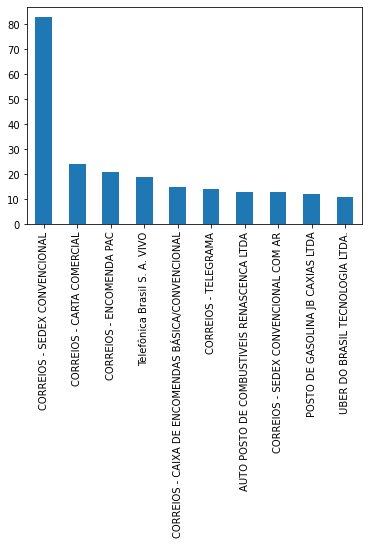

In [118]:
total.nomeFornecedor.value_counts()[:10].plot(kind='bar')